# Objective:
Predict the damage of an earthquake and learn to mitigate the effects by improving building conditions

- Supervised learning problem set
- Multi class or categorical predictions (1, 2 and 3)
- with multiple variables (38 variables/features), some numeric, some categorical, some binary

Dataset: https://www.drivendata.org/competitions/57/nepal-earthquake/

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [4]:
X_values = pd.read_csv('train_values.csv', index_col='building_id')
y_values = pd.read_csv('train_labels.csv', index_col='building_id')

## Data Visualisation

Please refer to other notebook 

## Preprossessing 
get_dummies function converts categorical variables to multiple binary variables (one-hot-encoding)

In [5]:
X_values_dummy = pd.get_dummies(X_values)
X_values_dummy.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_values_dummy_scaled = pd.DataFrame(scaler.fit_transform(X_values_dummy))
X_values_dummy_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,3.206391,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
1,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
2,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
3,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
4,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,3.206391,-1.789003,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_values_dummy_scaled, y_values, test_size = 0.30)
X_train.shape

(182420, 68)

In [8]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
81320,-1.605800,1.133787,1.465878,-0.178274,-0.360698,0.451241,-0.226419,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
118315,0.385835,0.952062,-1.666833,-0.178274,-0.156799,0.223565,-0.226419,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
45962,1.506130,1.262207,1.617262,-0.178274,0.318966,-0.231785,-0.226419,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
58195,1.506130,-1.604213,1.367973,-0.178274,0.047100,2.955668,-0.226419,-0.311877,-1.789003,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
160242,0.759267,-1.090535,1.141445,-1.552536,0.047100,-0.687135,-0.747683,-0.311877,-1.789003,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,6.802856,-0.075395,-5.096248,-0.101878


In [9]:
X_validation.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
126741,2.004039,-1.054190,0.169792,-0.178274,-0.088832,-0.687135,-0.226419,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
242633,-0.485505,-1.170494,-0.212232,1.195989,0.047100,0.223565,0.816109,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
53134,0.883744,-0.135869,0.504098,-0.178274,-0.292732,-0.231785,-0.226419,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
9308,1.506130,-0.293365,0.872136,-1.552536,-0.292732,-0.459460,-1.268946,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878
232896,0.385835,0.750952,-1.253544,-0.178274,-0.292732,-0.687135,-0.747683,-0.311877,0.558971,-0.188554,...,-0.013287,-0.012076,-0.024708,-0.149431,-0.036462,-0.119168,-0.146997,-0.075395,0.196223,-0.101878


## Modeling

### Option 1: Random Forest 
Use of grid search to identify optimal parameters of the Random Forest Classifier. Then running the Random Forest Classifier 

Following the guide https://www.drivendata.co/blog/richters-predictor-benchmark/

In [10]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.ensemble import RandomForestClassifier

# for combining the preprocess with model training
from sklearn.pipeline import make_pipeline

# for optimizing the hyperparameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [11]:
pipe = make_pipeline(StandardScaler(), 
                     RandomForestClassifier(random_state=2018))
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2018))])

In [12]:
param_grid = {'randomforestclassifier__n_estimators': [50, 100],
              'randomforestclassifier__min_samples_leaf': [1, 5],
              'randomforestclassifier__min_samples_split': [2, 50],
             }
gs = GridSearchCV(pipe, param_grid, cv=5)

This next script for grid search might take a long time to run (30 minutes)

In [13]:
gs.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=2018))]),
             param_grid={'randomforestclassifier__min_samples_leaf': [1, 5],
                         'randomforestclassifier__min_samples_split': [2, 50],
                         'randomforestclassifier__n_estimators': [50, 100]})

In [15]:
gs.best_params_

{'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 100}

In [16]:
from sklearn.metrics import f1_score

in_sample_preds = gs.predict(X_train)
in_sample_preds2 = gs.predict(X_validation)

print("f1 score of train data", f1_score(y_train, in_sample_preds, average='micro'))
print("f1 score of validation data", f1_score(y_validation, in_sample_preds2, average='micro'))

f1 score of train data 0.9881811204911742
f1 score of validation data 0.7084074135659559


The accuracy is much better for the train data compared to the validation data. This huge difference is likely due to overtraining of the model.
However this might not be the case as random forests have built in cross validation which makes it hard to overfit. Reference: 
https://towardsdatascience.com/one-common-misconception-about-random-forest-and-overfitting-47cae2e2c23b

### Submitting the predictions for the 1st model: Random Forest. 
Outputing the predictions into a csv file to upload to DrivenData website. 

In [18]:
test_values = pd.read_csv('test_values.csv', index_col='building_id')

test_values_dummy = pd.get_dummies(test_values)
test_values_dummy.head()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test_values_dummy_scaled = pd.DataFrame(scaler.fit_transform(test_values_dummy))
test_values_dummy_scaled.head()

test_preds = gs.predict(test_values_dummy_scaled)

In [21]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
my_submission = pd.DataFrame(data=test_preds,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [23]:
# Display the first few lines of the CSV file
import pandas as pd

# Read the CSV file and show the first 5 rows
df = pd.read_csv('submission.csv')
print(df.head())

   building_id  damage_grade
0       300051             3
1        99355             2
2       890251             2
3       745817             1
4       421793             3


### Option 2: Using Decision Tree and plotting the tree with Graphviz

Because the purpose of the decision tree is to visualise the feature sorting, we won't be using the scaled features here and we will only go with a max_depth of 4 (accuracy slightly increases with higher depth but the graph becomes less readable)

In [16]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

X_train, X_validation, y_train, y_validation = train_test_split(X_values_dummy, y_values, test_size = 0.30)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)        # train the decision tree model

# Plot the Decision Tree for Train Set
from sklearn.tree import export_graphviz
tree = export_graphviz(dectree,                                      # the model
                       feature_names = X_train.columns, # the features 
                       out_file = None,                              # output file
                       filled = True,                                # node colors
                       rounded = True,                               # make pretty
                       special_characters = True)                    # postscript   

import graphviz
graph = graphviz.Source(tree)
graph.format = "png"
graph.render("file_name")

'file_name.png'

Classification Accuracy of train data		: 0.6321839710558053
Classification Accuracy of validation data	: 0.6311763727759941



<AxesSubplot:>

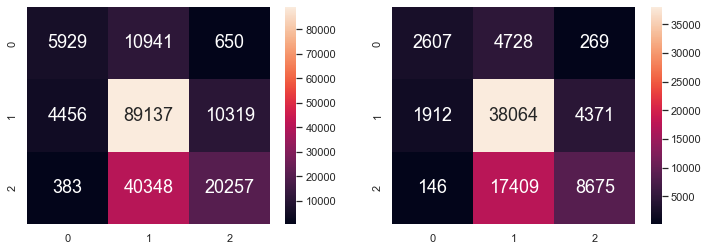

In [9]:
# Predict Response
y_train_pred = dectree.predict(X_train)
y_validation_pred = dectree.predict(X_validation)

# Check the Goodness of Fit
print("Classification Accuracy of train data\t\t:", dectree.score(X_train, y_train))
print("Classification Accuracy of validation data\t:", dectree.score(X_validation, y_validation))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot the Confusion Matrix for Train
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

# Plot the Confusion Matrix for validation
sb.heatmap(confusion_matrix(y_validation, y_validation_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

There seems to be an abnormally large number of false predictions in the bottom middle box. If we are able to reduce this false result with some data augmentation, our model could potentially perform better. 

### Option 3: Lightgbm

Here we use a newer model based on the decision tree that incorporates advanced concepts like momentum and gradient descent
It is much faster than the first model and have comparable accuracy

This model also provides some neat functions that tell us the importance of each feature and even plot the decision tree!!
Since we will be doing such visualisation, we will use a max_depth of 4 and non-scaled features. 

Reference: https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/


In [46]:
import lightgbm as lgb

modellgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=4,random_state=42)

X_train, X_validation, y_train, y_validation = train_test_split(X_values_dummy, y_values, test_size = 0.30)

modellgb.fit(X_train, y_train, eval_set=[(X_validation, y_validation),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's multi_logloss: 0.737645	valid_0's multi_logloss: 0.736251
[40]	training's multi_logloss: 0.708249	valid_0's multi_logloss: 0.707871
[60]	training's multi_logloss: 0.69289	valid_0's multi_logloss: 0.69325
[80]	training's multi_logloss: 0.683291	valid_0's multi_logloss: 0.684562
[100]	training's multi_logloss: 0.675255	valid_0's multi_logloss: 0.677467


LGBMClassifier(learning_rate=0.09, max_depth=4, random_state=42)

In [47]:
print('Training accuracy {:.4f}'.format(modellgb.score(X_train, y_train)))
print('Validation accuracy {:.4f}'.format(modellgb.score(X_validation, y_validation)))

Training accuracy 0.6912
Validation accuracy 0.6911


Below we plot Feature importance based on number of times the feature is used for split

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

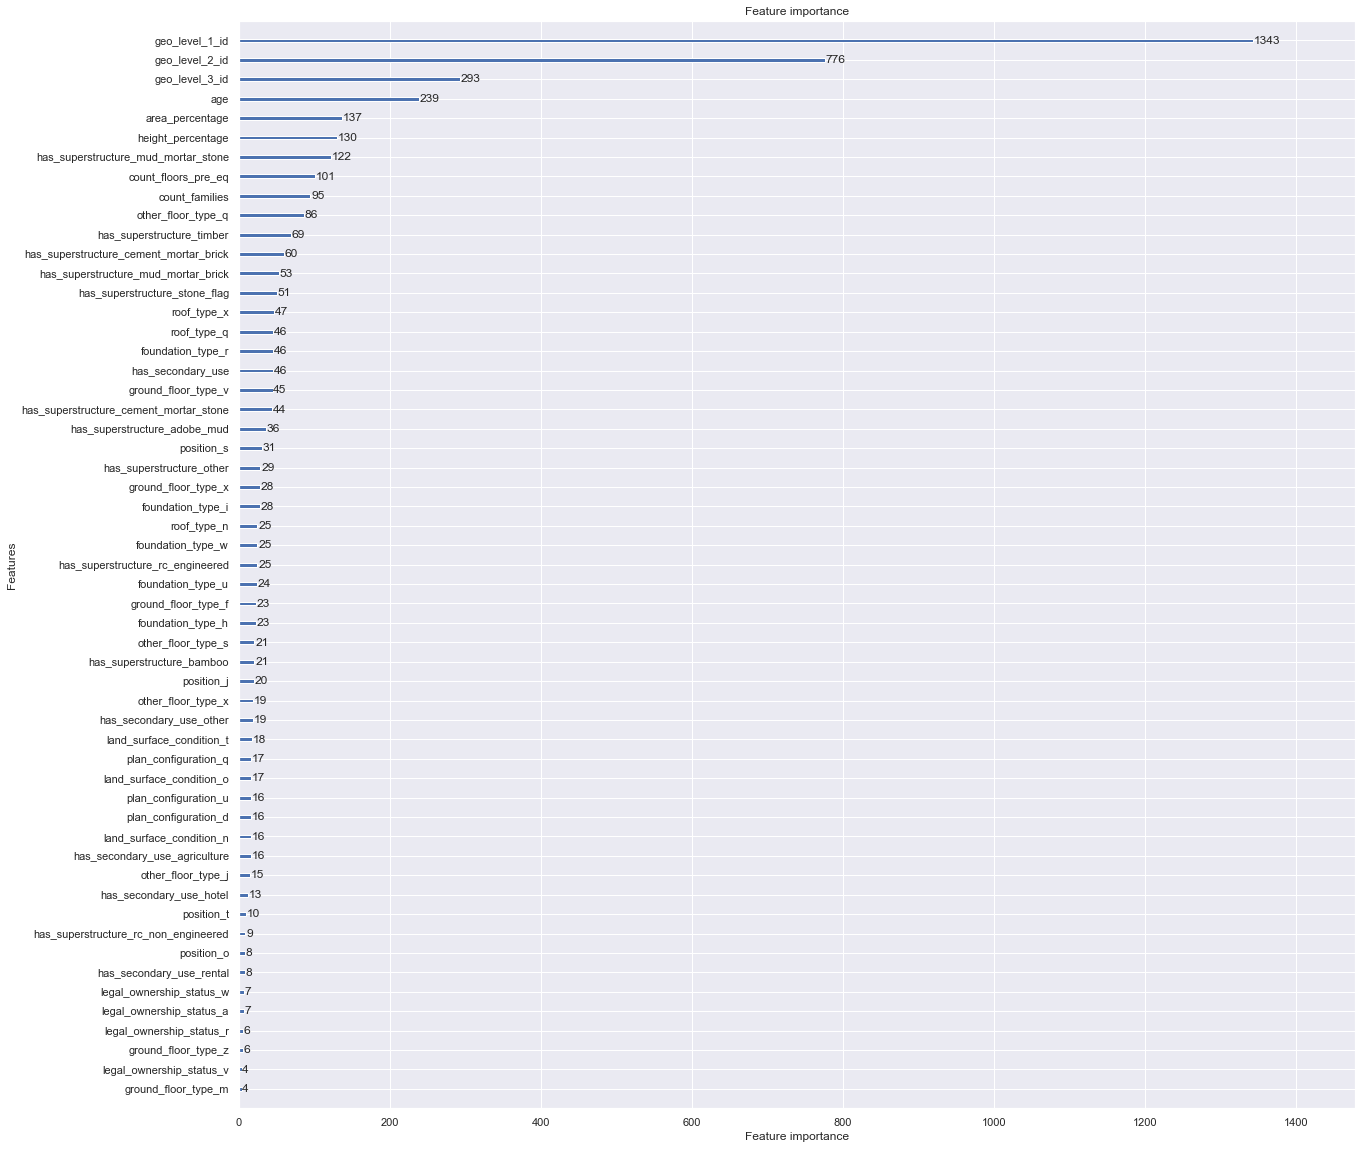

In [49]:
lgb.plot_importance(modellgb, figsize=(20,20), importance_type = "split")

Below we plot the feature importance based on the information gain each time the feature is used 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

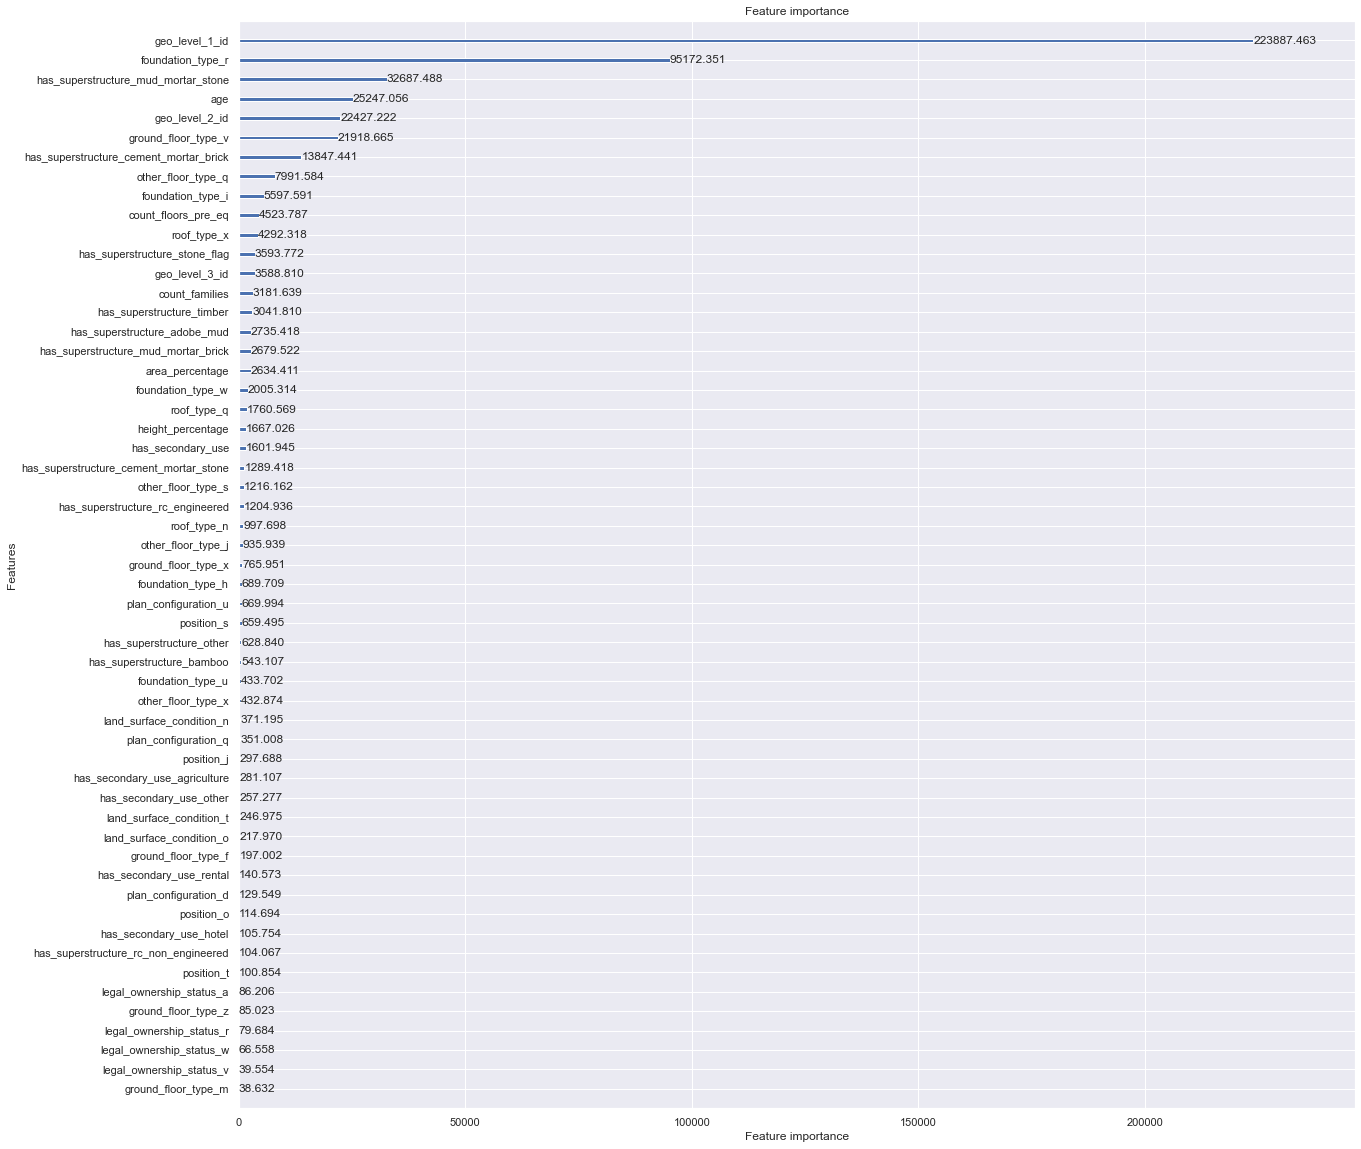

In [48]:
lgb.plot_importance(modellgb, figsize=(20,20), importance_type = "gain")

References: https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27

From the first graph, we can tell that the top 3 features for prediction are geographical ids. This makes sense because the area nearest to the earthquake will face the greatest damage. 
However, our objective is to predict the damage caused by future earthquakes which will not strike the same area. Hence, this area feature is not useful in our current objective. 

A better feature if we are able to change the dataset is the distance of the building from the earthquake centre. 

Having said this, we will base our predictions on other features that are not area-based. The most important features besides the area are age, foundation type r, area percentage, height percentage, has_superstructure_mortar_stone

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

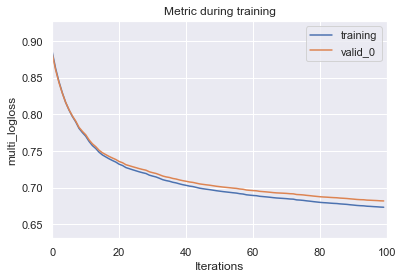

In [98]:
lgb.plot_metric(modellgb)

<AxesSubplot:>

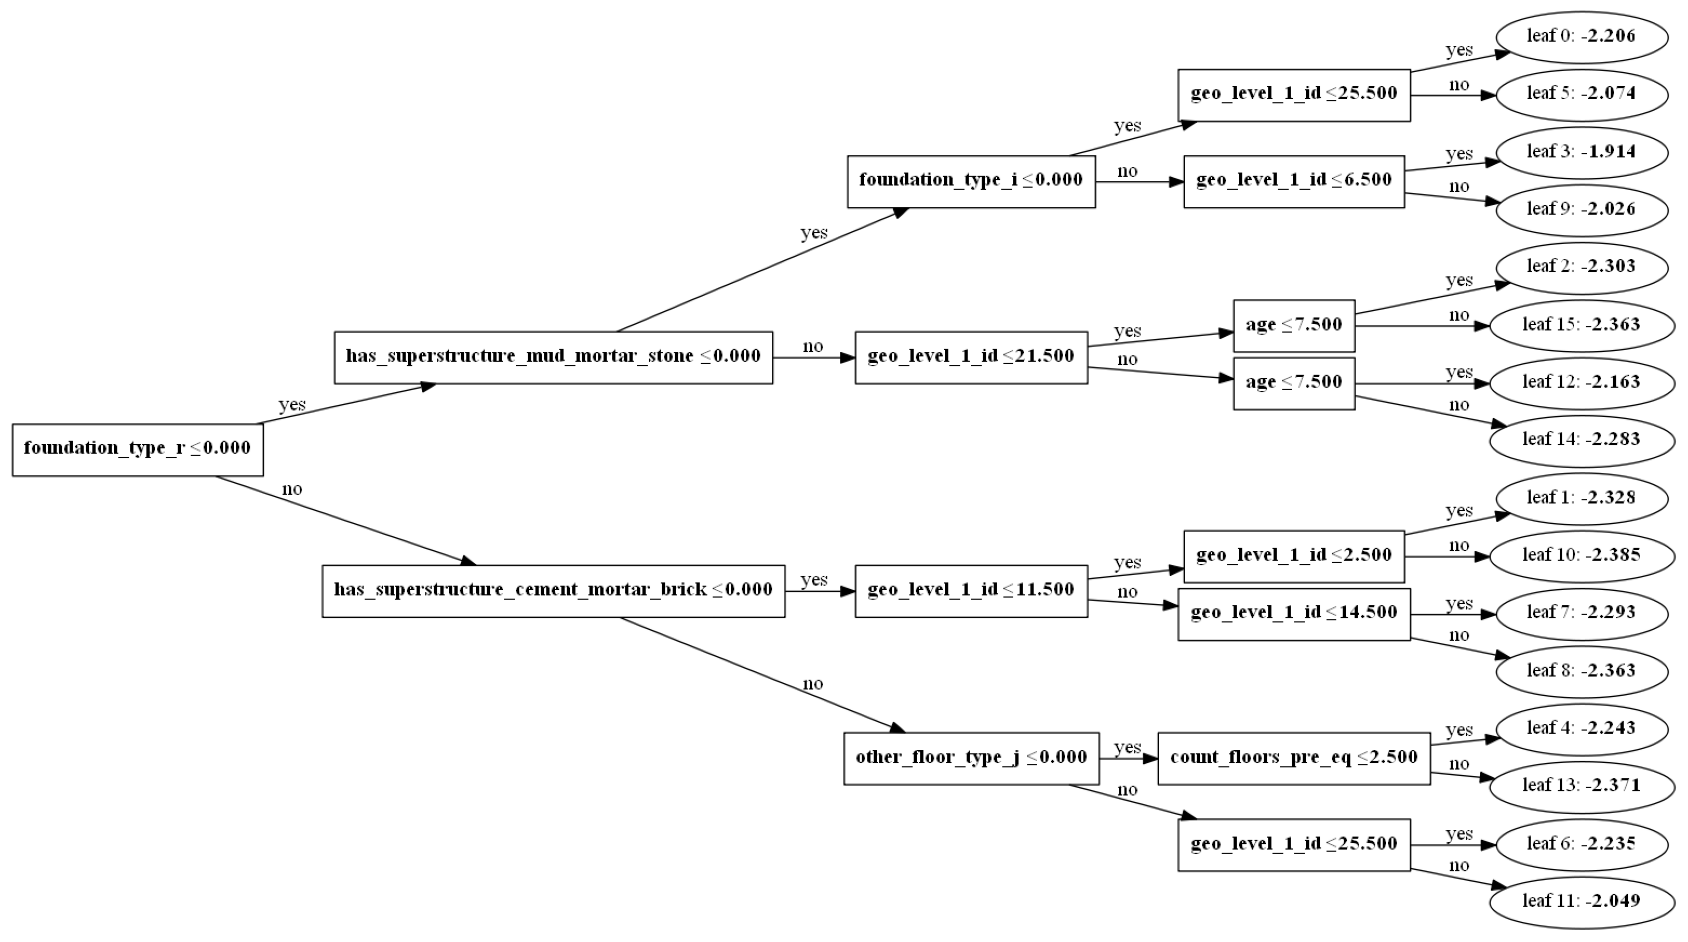

In [104]:
lgb.plot_tree(modellgb,figsize=(30,60))

The decision tree is very similar to the decision tree ploted with the conventional decision tree model from sklearn

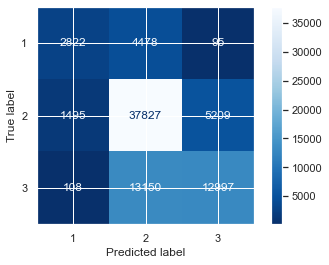

In [105]:
from sklearn import metrics

metrics.plot_confusion_matrix(modellgb, X_validation,y_validation,cmap='Blues_r')

In [106]:
print(metrics.classification_report(y_validation,modellgb.predict(X_validation)))

              precision    recall  f1-score   support

           1       0.64      0.38      0.48      7395
           2       0.68      0.85      0.76     44531
           3       0.71      0.50      0.58     26255

    accuracy                           0.69     78181
   macro avg       0.68      0.58      0.61     78181
weighted avg       0.69      0.69      0.67     78181



This classification report above gives us even more detailed information about the goodness of fit

### Creating subset to test feature importance given by Lightgbm model

Based on the lightgbm graph of feature importance we can remove the features that are not important only need the top 6 features to get similar prediction accuracy. To put this to the test, we try creating a subset and testing out Lightgbm model on it

In [107]:
X_values_subset = X_values[["geo_level_1_id", 'geo_level_2_id', 'geo_level_3_id', "age", "area_percentage", 
                       "height_percentage"]]
# top 6 Variables chosen

X_values_dummy_subset = pd.get_dummies(X_values_subset)
X_train, X_validation, y_train, y_validation = train_test_split(X_values_dummy_subset, y_values, test_size = 0.30)

modellgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=5,random_state=42)
modellgb.fit(X_train, y_train, eval_set=[(X_validation, y_validation),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

print('Training accuracy {:.4f}'.format(modellgb.score(X_train, y_train)))
print('Validation accuracy {:.4f}'.format(modellgb.score(X_validation, y_validation)))

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's multi_logloss: 0.748371	valid_0's multi_logloss: 0.750229
[40]	training's multi_logloss: 0.724106	valid_0's multi_logloss: 0.727472
[60]	training's multi_logloss: 0.709922	valid_0's multi_logloss: 0.714634
[80]	training's multi_logloss: 0.699473	valid_0's multi_logloss: 0.70559
[100]	training's multi_logloss: 0.690034	valid_0's multi_logloss: 0.697267
Training accuracy 0.6886
Validation accuracy 0.6849


As you can see, the accuracy dropped by only 1.5% because the 6 features used are the most important